# Ablation runtime

the current version of this plot relies on the regularization runtimes, so ablation_regularization has to be run before calling this script

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

import corc.our_datasets

cache_path = "../../cache"

In [3]:
def get_tNEB(dataset_name, cache_path):
    filename = os.path.join(cache_path, f"{dataset_name}_TMM-NEB.pickle")
    if os.path.exists(filename):
        with open(filename, "rb") as f:
            tmms = pickle.load(f)
    else:
        print("pickle not found!")
    return tmms


In [4]:
datasets = corc.our_datasets.CORE_HD_DATASETS

# Create lists to store the average runtime values for each dataset
time_mixture_values = dict()
time_neb_values = dict()

for dataset in datasets:
    tmms = get_tNEB(dataset, cache_path)
    time_mixture_dataset = [tmm.time_mixture for tmm in tmms]
    time_neb_dataset = [tmm.time_NEB for tmm in tmms]
    time_mixture_values[dataset] = np.mean(time_mixture_dataset)
    time_neb_values[dataset] = np.mean(time_neb_dataset)


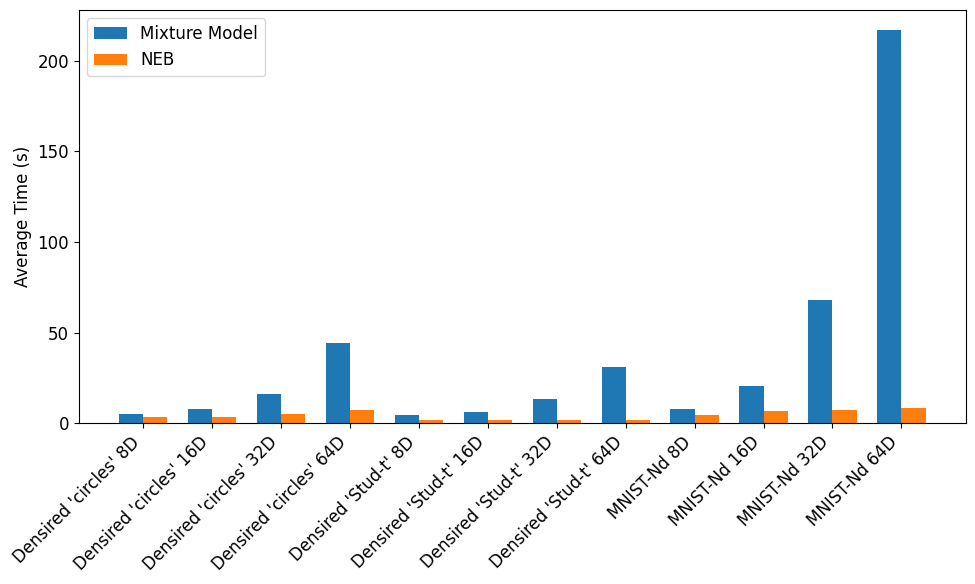

In [7]:

# Create the plot
plt.rcParams.update({"font.size": 12})
fig, axs = plt.subplots(1, figsize=(10, 6))

# Plot the average time_mixture and time_NEB values
bar_width = 0.35
x = np.arange(len(time_mixture_values.keys()))
axs.bar(x - bar_width/2, time_mixture_values.values(), bar_width, label='Mixture Model')
axs.bar(x + bar_width/2, time_neb_values.values(), bar_width, label='NEB')

# axs.set_xlabel('Dataset')
axs.set_ylabel('Average Time (s)')
# axs.set_title('Average Time for Mixture Model and NEB')
axs.set_xticks(x)
labels = [corc.our_datasets.dataset_displaynames[dataset].replace("\n", " ") for dataset in time_mixture_values.keys()]
axs.set_xticklabels(labels, rotation=45, ha='right')
axs.legend()

# Show the plots
plt.tight_layout()
# plt.yscale('log')
plt.savefig(os.path.join(cache_path, "../figures", "runtime.pdf"), bbox_inches="tight")
plt.show()